In [2]:
## Importing libraies 

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# Load inventory datasets

inventory = pd.read_excel("G:\TEST\cpoint5\Inventory Dataset.xlsx")
new_inventory = pd.read_excel("New Inventory.xlsx")

In [4]:
### Function to calculate previous Saturday

def get_previous_saturday(current_date):
    days_to_subtract = (current_date.weekday() - 5) % 7
    return current_date - timedelta(days=days_to_subtract)

In [5]:
# Pivot tables
inventory_updated = inventory.pivot_table(index=['Item Number'], columns='Date', values='Inventory')
new_inventory['previous_saturday'] = new_inventory['Inventory Receive'].apply(get_previous_saturday)
new_inventory_grouped = new_inventory.groupby(['Item Number', 'previous_saturday']).agg({'Total Item Qty': 'sum'}).reset_index()
new_inventory_updated = new_inventory_grouped.pivot_table(index=['Item Number'], columns='previous_saturday', values='Total Item Qty', aggfunc='first')
new_inventory_updated.fillna(0, inplace=True)

In [6]:
# Merge datasets
final_df = pd.merge(inventory_updated, new_inventory_updated, on='Item Number')

In [7]:
# Convert date columns to numeric
date_columns = final_df.columns[1:]
final_df[date_columns] = final_df[date_columns].apply(pd.to_numeric, errors='coerce')

In [8]:
final_df.head()

,2023-06-17 00:00:00,2023-07-01 00:00:00,2023-07-08 00:00:00,2023-07-15 00:00:00,2023-07-22 00:00:00,2023-07-29 00:00:00,2023-08-12 00:00:00,2023-08-19 00:00:00,2023-09-02 00:00:00,2023-09-09 00:00:00,2023-09-16 00:00:00,2023-09-23 00:00:00,2023-10-07 00:00:00,2023-10-21 00:00:00,2023-11-25 00:00:00,2023-12-02 00:00:00,2023-12-09 00:00:00
Item Number,,,,,,,,,,,,,,,,,
064-01-1346,2954,1072.0,4464.0,0.0,0.0,1400.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-1347,3561,1000.0,5568.0,0.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-1348,3028,788.0,3564.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-1349,2036,1000.0,4824.0,0.0,0.0,2624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-1351,2488,848.0,1956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Calculate monthly total
monthly_total = final_df.groupby('Item Number')[date_columns].sum()

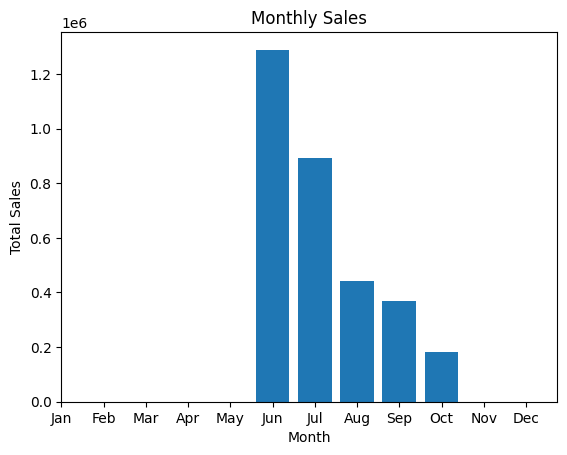

In [10]:
# Assuming final_df is your DataFrame
final_df.reset_index(inplace=True)

# Melt the DataFrame to convert columns to rows
melted_df = pd.melt(final_df, id_vars=['Item Number'], var_name='Date', value_name='Inventory')

# Convert the 'Date' column to datetime format
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Extract the month from the 'Date' column
melted_df['Month'] = melted_df['Date'].dt.month

# Group by 'Month' and sum the 'Inventory' values
monthly_sales = melted_df.groupby('Month')['Inventory'].sum().reset_index()

# Create a bar plot
plt.bar(monthly_sales['Month'], monthly_sales['Inventory'])

# Set labels and title
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Set x-axis ticks to represent each month
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.show()


In [12]:
# Save the final dataframe to a CSV file
final_df.to_csv('Submission.csv')